<a href="https://colab.research.google.com/github/dchung1209/CxC-2023-UWaterloo/blob/main/CxC_project_gang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Reading Data

In [225]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [226]:
train_df = pd.read_csv("/content/drive/MyDrive/new_train.csv", index_col=0)
test_df = pd.read_csv("/content/drive/MyDrive/Intact.csv", index_col=0)

### Train Set Label Distribution

In [224]:
import matplotlib.pyplot as plt

In [237]:
train_df.shape

(3969, 3)

In [227]:
train_df.head()

,medical_specialty,transcription,labels
0,Emergency Room Reports,"REASON FOR THE VISIT:, Very high PT/INR.,HIST...",0
1,Surgery,"PREOPERATIVE DIAGNOSIS:, Acetabular fracture ...",1
2,Surgery,"NAME OF PROCEDURE,1. Selective coronary angio...",1
3,Radiology,"REFERRING DIAGNOSIS: , Motor neuron disease.,P...",2
4,Emergency Room Reports,"CHIEF COMPLAINT: , Dental pain.,HISTORY OF PRE...",0


In [228]:
test_df.head()

,transcription
0,"PAST MEDICAL CONDITION:, None.,ALLERGIES:, N..."
1,"CURRENT HISTORY:, A 94-year-old female from t..."
2,"TITLE OF PROCEDURE: ,Coronary artery bypass g..."
3,"PROCEDURE: , Bilateral L5, S1, S2, and S3 radi..."
4,"OPERATIVE PROCEDURES: , Colonoscopy and biopsi..."


In [229]:
print(f"the number of N/A values in trascription is: {train_df.transcription.isna().sum()}")

the number of N/A values in trascription is: 0


In [230]:
print(f"the number of N/A values in medical_specialty is: {train_df.medical_specialty.isna().sum()}")

the number of N/A values in medical_specialty is: 0


In [231]:
print(f"the size of data(shape) is: {train_df.shape}")

the size of data(shape) is: (3969, 3)


In [232]:
freq = train_df.groupby('medical_specialty').count().reset_index()[['medical_specialty', 'transcription']].sort_values(by='transcription', ascending=False).rename(columns = {'transcription' : 'frequency'})
freq.head()

,medical_specialty,frequency
38,Surgery,863
5,Consult - History and Phy.,410
3,Cardiovascular / Pulmonary,309
27,Orthopedic,289
33,Radiology,213


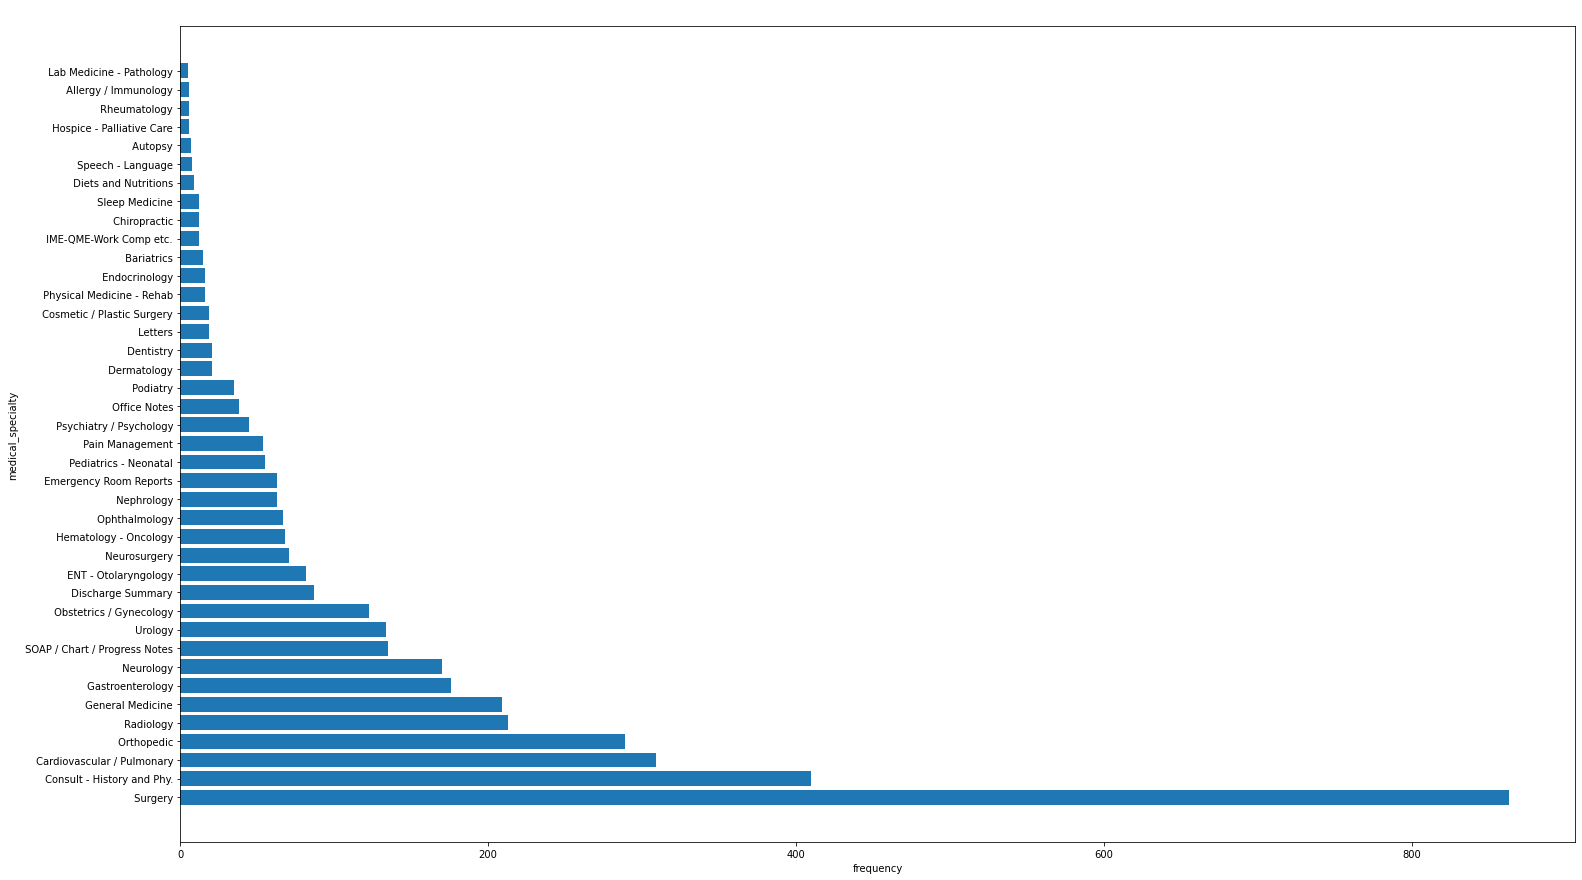

In [233]:
data = freq.frequency.tolist()
df = freq.medical_specialty.tolist()
plt.figure(figsize=(25,15))

font_title = {
         'color': 'white',
         'weight': 'normal',
         'size': 'xx-large'
         }
         
plt.barh(df, data)
plt.title('store inventory')
plt.ylabel('medical_specialty')
plt.xlabel('frequency')
plt.title('medical_specialty frequency', fontdict = font_title)
plt.show()

In [234]:
word = pd.DataFrame({'medical_specialty': train_df['medical_specialty'], 'word_count': train_df["transcription"].apply(lambda n: len(n.split()))})

In [235]:
word.groupby('medical_specialty').mean().reset_index().sort_values(by='word_count', ascending=False).merge(freq, how='inner')

,medical_specialty,word_count,frequency
0,Autopsy,1352.428571,7
1,IME-QME-Work Comp etc.,1230.916667,12
2,Chiropractic,978.666667,12
3,Psychiatry / Psychology,794.622222,45
4,Hospice - Palliative Care,676.166667,6
5,Endocrinology,639.812500,16
6,Neurosurgery,567.577465,71
7,Orthopedic,562.560554,289
8,Emergency Room Reports,561.285714,63
9,Consult - History and Phy.,560.182927,410


### Cleaning

In [236]:
import nltk
from nltk.corpus import stopwords
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [220]:
def basic_cleaner(transcription):
  # Lower Case
  transcription = transcription.lower()
  # Remove numbers and special characters
  transcription = re.sub('[^a-zA-Z \n]', '', transcription)
  return transcription

In [221]:
def stop_words_removal(transcription):
  pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
  text = pattern.sub('', transcription)
  return text

In [222]:
train_df['transcription'] = train_df['transcription'].apply(basic_cleaner)
train_df['transcription'] = train_df['transcription'].apply(stop_words_removal)

### Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [196]:
labels = train_df['medical_specialty'].to_list()
category = train_df['medical_specialty'].unique()

In [211]:
def tfidf(transcription):
  from sklearn.feature_extraction.text import TfidfVectorizer
  from sklearn.metrics.pairwise import cosine_similarity
  tfidf = TfidfVectorizer(analyzer='word', stop_words='english', ngram_range=(1, 2), max_df = 0.75, min_df = 0.05, max_features= 500)
  tfidf_matrix  = tfidf.fit_transform(transcription)
  print(f"The size of TF-IDF(shape) is : {tfidf_matrix.shape}")
  return tfidf_matrix

In [212]:
result = tfidf(train_df['transcription'])

The size of TF-IDF(shape) is : (3969, 500)


In [213]:
X_train, X_test, y_train, y_test = train_test_split(result, labels, stratify = labels, random_state = 1)  

In [214]:
clf = LogisticRegression(penalty= 'elasticnet', solver= 'saga', l1_ratio=0.5, random_state=1).fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [215]:
y_test_pred = clf.predict(X_test)

In [216]:
print(classification_report(y_test , y_test_pred, labels=category))

                                precision    recall  f1-score   support

        Emergency Room Reports       0.17      0.06      0.09        16
                       Surgery       0.42      0.75      0.54       216
                     Radiology       0.24      0.23      0.24        53
                      Podiatry       0.00      0.00      0.00         9
                     Neurology       0.30      0.30      0.30        43
              Gastroenterology       0.38      0.18      0.25        44
                    Orthopedic       0.21      0.21      0.21        72
    Cardiovascular / Pulmonary       0.34      0.31      0.32        77
                    Nephrology       0.50      0.25      0.33        16
          ENT - Otolaryngology       0.33      0.05      0.08        21
              General Medicine       0.11      0.08      0.09        52
         Hematology - Oncology       0.00      0.00      0.00        17
    Cosmetic / Plastic Surgery       0.00      0.00      0.00  

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Making Inference on the Test Set

In [217]:
test_df['transcription'] = test_df['transcription'].apply(basic_cleaner)
test_df['transcription'] = test_df['transcription'].apply(stop_words_removal)
y_test_pred = clf.predict(tfidf(test_df['transcription']))

The size of TF-IDF(shape) is : (997, 500)


In [218]:
from google.colab import files
a = pd.Series(y_test_pred)
a.name = "Predicted"
files.download("Predicted.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>